# 1. Importing Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import metrics, preprocessing, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 2. Importing Dataset

In [2]:
df = pd.read_csv(r"D:\nikoo\Dataset\cell_samples.csv")

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# 3. Cleaning Dataset

In [4]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [5]:
df = df[pd.to_numeric(df["BareNuc"], errors="coerce").notnull()]
df = df.astype({"BareNuc":'int64'})

# 4. Plotting

<AxesSubplot:xlabel='MargAdh', ylabel='Mit'>

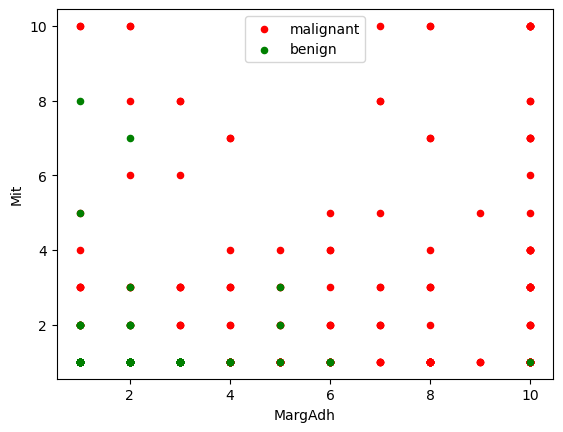

In [6]:
ax = df[df["Class"]==4].plot(kind="scatter", color="red", x="MargAdh", y="Mit", label="malignant")
df[df["Class"]==2].plot(kind="scatter", color="green", x="MargAdh", y="Mit", label="benign", ax=ax)

# 5.  Define X(features) & y(label)

In [7]:
X=  df[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]
y = df[["Class"]]

# 6. Normalize Dataset

In [8]:
scale = preprocessing.StandardScaler().fit(X)
X = scale.fit_transform(X)

# 7. Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 8. Modelling

In [10]:
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train.values.ravel()) 

SVC(kernel='sigmoid')

# 9. Predicting

In [11]:
y_pred = clf.predict(X_test)

In [12]:
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
y_test

,Class
115,2
392,2
316,4
519,4
313,2
...,...
458,2
165,2
331,2
80,2


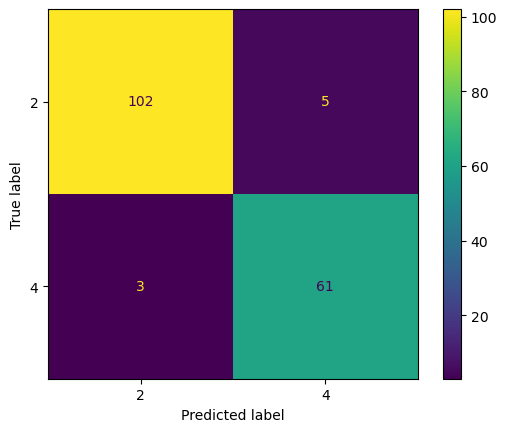

In [14]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [2, 4])
cm_display.plot()

# 10. Check Accuracy

In [15]:
accuracy_score(y_test, y_pred)

0.9532163742690059